# Analyse de la varicelle

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [3]:
data_url = 'http://www.sentiweb.fr/datasets/incidence-PAY-7.csv'

In [4]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202018          7    912       47    1777       1           0   
1     202017          7    272        0     658       0           0   
2     202016          7    758       78    1438       1           0   
3     202015          7   1918      675    3161       3           1   
4     202014          7   3879     2227    5531       6           3   
5     202013          7   7326     5236    9416      11           8   
6     202012          7   8123     5790   10456      12           8   
7     202011          7  10198     7568   12828      15          11   
8     202010          7   9011     6691   11331      14          10   
9     202009          7  13631    10544   16718      21          16   
10    202008          7  10424     7708   13140      16          12   
11    202007          7   8959     6574   11344      14          10   
12    202006          7   9264     6925   11603      14          10   
13    202005          7   8505     6314   10696      13          10   
14    202004          7   7991     5831   10151      12           9   
15    202003          7   5968     4100    7836       9           6   
16    202002          7   6534     4530    8538      10           7   
17    202001          7   9835     7019   12651      15          11   
18    201952          7   7941     5246   10636      12           8   
19    201951          7   5823     3675    7971       9           6   
20    201950          7   6424     4276    8572      10           7   
21    201949          7   6621     4540    8702      10           7   
22    201948          7   5542     3383    7701       8           5   
23    201947          7   7536     5058   10014      11           7   
24    201946          7   2638     1316    3960       4           2   
25    201945          7   4492     2615    6369       7           4   
26    201944          7   5728     3627    7829       9           6   
27    201943          7   4834     2751    6917       7           4   
28    201942          7   6279     3989    8569      10           7   
29    201941          7   4130     2030    6230       6           3   
...      ...        ...    ...      ...     ...     ...         ...   
1505  199126          7  17608    11304   23912      31          20   
1506  199125          7  16169    10700   21638      28          18   
1507  199124          7  16171    10071   22271      28          17   
1508  199123          7  11947     7671   16223      21          13   
1509  199122          7  15452     9953   20951      27          17   
1510  199121          7  14903     8975   20831      26          16   
1511  199120          7  19053    12742   25364      34          23   
1512  199119          7  16739    11246   22232      29          19   
1513  199118          7  21385    13882   28888      38          25   
1514  199117          7  13462     8877   18047      24          16   
1515  199116          7  14857    10068   19646      26          18   
1516  199115          7  13975     9781   18169      25          18   
1517  199114          7  12265     7684   16846      22          14   
1518  199113          7   9567     6041   13093      17          11   
1519  199112          7  10864     7331   14397      19          13   
1520  199111          7  15574    11184   19964      27          19   
1521  199110          7  16643    11372   21914      29          20   
1522  199109          7  13741     8780   18702      24          15   
1523  199108          7  13289     8813   17765      23          15   
1524  199107          7  12337     8077   16597      22          15   
1525  199106          7  10877     7013   14741      19          12   
1526  199105          7  10442     6544   14340      18          11   
1527  199104          7   7913     4563   11263      14           8   
1528  199103          7  15387    10484   20290      27          18   
1529  199102          7  16277  

Analyse des points manquants

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Comme toutes les données sont correctes, on les prend toutes. On garde le terme data.

In [7]:
data = raw_data

On fait la conversion des semaines comme pour l'analyse du syndrome grippal

In [8]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [9]:
sorted_data = data.set_index('period').sort_index()

In [10]:
sorted_data

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   
1991-01-07/1991-01-13  199102          7  16277    11046   21508      29   
1991-01-14/1991-01-20  199103          7  15387    10484   20290      27   
1991-01-21/1991-01-27  199104          7   7913     4563   11263      14   
1991-01-28/1991-02-03  199105          7  10442     6544   14340      18   
1991-02-04/1991-02-10  199106          7  10877     7013   14741      19   
1991-02-11/1991-02-17  199107          7  12337     8077   16597      22   
1991-02-18/1991-02-24  199108          7  13289     8813   17765      23   
1991-02-25/1991-03-03  199109          7  13741     8780   18702      24   
1991-03-04/1991-03-10  199110          7  16643    11372   21914      29   
1991-03-11/1991-03-17  199111          7  15574    11184   19964      27   
1991-03-18/1991-03-24  199112          7  10864     7331   14397      19   
1991-03-25/1991-03-31  199113          7   9567     6041   13093      17   
1991-04-01/1991-04-07  199114          7  12265     7684   16846      22   
1991-04-08/1991-04-14  199115          7  13975     9781   18169      25   
1991-04-15/1991-04-21  199116          7  14857    10068   19646      26   
1991-04-22/1991-04-28  199117          7  13462     8877   18047      24   
1991-04-29/1991-05-05  199118          7  21385    13882   28888      38   
1991-05-06/1991-05-12  199119          7  16739    11246   22232      29   
1991-05-13/1991-05-19  199120          7  19053    12742   25364      34   
1991-05-20/1991-05-26  199121          7  14903     8975   20831      26   
1991-05-27/1991-06-02  199122          7  15452     9953   20951      27   
1991-06-03/1991-06-09  199123          7  11947     7671   16223      21   
1991-06-10/1991-06-16  199124          7  16171    10071   22271      28   
1991-06-17/1991-06-23  199125          7  16169    10700   21638      28   
1991-06-24/1991-06-30  199126          7  17608    11304   23912      31   
...                       ...        ...    ...      ...     ...     ...   
2019-10-07/2019-10-13  201941          7   4130     2030    6230       6   
2019-10-14/2019-10-20  201942          7   6279     3989    8569      10   
2019-10-21/2019-10-27  201943          7   4834     2751    6917       7   
2019-10-28/2019-11-03  201944          7   5728     3627    7829       9   
2019-11-04/2019-11-10  201945          7   4492     2615    6369       7   
2019-11-11/2019-11-17  201946          7   2638     1316    3960       4   
2019-11-18/2019-11-24  201947          7   7536     5058   10014      11   
2019-11-25/2019-12-01  201948          7   5542     3383    7701       8   
2019-12-02/2019-12-08  201949          7   6621     4540    8702      10   
2019-12-09/2019-12-15  201950          7   6424     4276    8572      10   
2019-12-16/2019-12-22  201951          7   5823     3675    7971       9   
2019-12-23/2019-12-29  201952          7   7941     5246   10636      12   
2019-12-30/2020-01-05  202001          7   9835     7019   12651      15   
2020-01-06/2020-01-12  202002          7   6534     4530    8538      10   
2020-01-13/2020-01-19  202003          7   5968     4100    7836       9   
2020-01-20/2020-01-26  202004          7   7991     5831   10151      12   
2020-01-27/2020-02-02  202005          7   8505     6314   10696      13   
2020-02-03/2020-02-09  202006          7   9264     6925   11603      14   
2020-02-10/2020-02-16  202007          7   8959     6574   11344      14   
2020-02-17/2020-02-23  202008          7  10424     7708   13140      16 

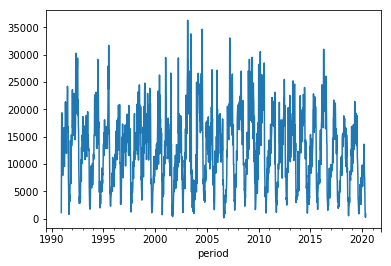

In [11]:
sorted_data['inc'].plot()

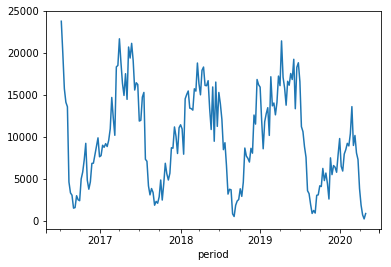

In [12]:
sorted_data['inc'][-200:].plot()

C'est en aout que l'épidémie est la plus faible, on coupe l'année à ce niveau là

In [23]:
first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [24]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

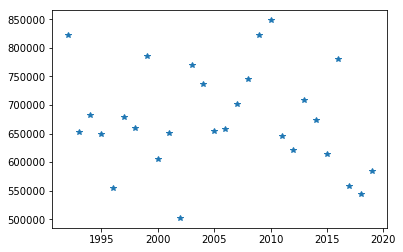

In [25]:
yearly_incidence.plot(style='*')

In [26]:
yearly_incidence.sort_values()

2002    502271
2018    543281
1996    553859
2017    557449
2019    584926
2000    605096
2015    613286
2012    620315
2011    645042
1995    648598
2001    650660
1993    653058
2005    654308
2006    657482
1998    660316
2014    673458
1997    679308
1994    682920
2007    701566
2013    708874
2004    736266
2008    745701
2003    770211
2016    780645
1999    784963
1992    821558
2009    822819
2010    848236
dtype: int64

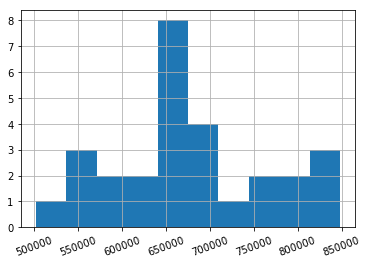

In [27]:
yearly_incidence.hist(xrot=20)